In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm import tqdm
import pandas as pd
import string
from typing import Optional

In [4]:
#!pip install navec

  Using cached navec-0.10.0-py3-none-any.whl (23 kB)


In [5]:
from navec import Navec
path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [6]:
data = pd.read_csv('book_new_1.csv', header=None)

In [7]:
data

,0
0,электронная торговля
1,локальные и глобальные экстремумы
2,перекредитование
3,робототехника
4,процессное управление
...,...
938,предприятие
939,кредитные ресурсы
940,рентабельность чистой прибыли
941,региональные вузы


In [8]:
class PhraseEmbeddings:
    def __init__(self, phrase, embbedings):
        self.phrase: string = phrase
        self.embbedings: [float] = embbedings

def calculateEmbeddingsForSplittedPhrase(phrase: [string]) -> Optional[PhraseEmbeddings]:
    embeddings: [[]] = []
        
    for word in phrase:
        tempEmbedding = navec.get(word)

        if tempEmbedding is not None:
            embeddings.append(tempEmbedding)

    if len(embeddings) != 0:
        return PhraseEmbeddings(' '.join(phrase), np.mean(embeddings, axis=0))
    else:
        # return None -> if navec could not determine the embeddings of all words of the phrase.
        return None

In [9]:
emb = []
phrases = []
i = 0
for row in data[0]:
    if len(row.split()) == 1:
        res = navec.get(row)
        if res is not None:
            emb.append(res)
            phrases.append(row)
    else:
        res = calculateEmbeddingsForSplittedPhrase(np.array(row.split()))
        if res is not None:
            emb.append(res.embbedings)
            phrases.append(row)

In [10]:
Z = np.array(phrases)

In [11]:
Z.shape

(907,)

In [12]:
X = np.array(emb)

In [13]:
X.shape

(907, 300)

In [14]:
#np.random.seed(48)

In [15]:
sil = []
dist = []
k_min = 2
k_max = 100

for k in tqdm(range(k_min,k_max+1)):
    kmm = KMeans(n_clusters=k, random_state=1).fit(X)
    
    y_pred = kmm.predict(X)
    sil1 = silhouette_score(X, y_pred)
    sil.append(sil1)
    
    dist1 = kmm.inertia_
    dist.append(dist1)

100%|██████████| 99/99 [1:17:01<00:00, 46.68s/it]


In [16]:
print(sil)

[0.044075936, 0.040718675, 0.057109945, 0.050700944, 0.050753772, 0.04956129, 0.05132573, 0.051298693, 0.049972795, 0.049719613, 0.045606494, 0.042824734, 0.044597723, 0.046354864, 0.046706945, 0.042477418, 0.038826052, 0.03535749, 0.03462264, 0.04114742, 0.041886028, 0.043231744, 0.04717238, 0.04920038, 0.049299162, 0.05160298, 0.047018394, 0.044694725, 0.053979922, 0.041687764, 0.04483925, 0.046030357, 0.048638333, 0.04936119, 0.050030723, 0.051564537, 0.052620884, 0.053886596, 0.05582872, 0.06022384, 0.060238283, 0.06148409, 0.06289135, 0.06282781, 0.06709829, 0.06871759, 0.06557316, 0.06508238, 0.07100362, 0.06431453, 0.0707326, 0.06370637, 0.07340894, 0.06430472, 0.065081045, 0.06685665, 0.06781995, 0.06938539, 0.06890666, 0.07278966, 0.07292229, 0.07313927, 0.0731354, 0.074069865, 0.06913903, 0.07516727, 0.07538703, 0.0774237, 0.07666832, 0.07781031, 0.07935605, 0.07984177, 0.08152451, 0.083024554, 0.08434229, 0.08559198, 0.08397164, 0.085019484, 0.086654924, 0.08812449, 0.088506

In [17]:
print(dist)

[18571.203125, 17973.25, 17440.98046875, 16992.916015625, 16625.697265625, 16376.5830078125, 16165.947265625, 15990.5810546875, 15865.3408203125, 15669.1767578125, 15483.5068359375, 15320.7158203125, 15231.5263671875, 15093.251953125, 14975.2734375, 14849.8876953125, 14800.169921875, 14728.578125, 14680.2392578125, 14560.3359375, 14435.0517578125, 14368.8681640625, 14276.4091796875, 14141.4501953125, 14127.4755859375, 14048.8740234375, 13957.65625, 13897.978515625, 13817.2138671875, 13748.00390625, 13642.345703125, 13585.640625, 13503.91015625, 13436.826171875, 13391.6650390625, 13327.8701171875, 13236.1123046875, 13165.6181640625, 13113.451171875, 13011.8701171875, 12987.3515625, 12909.53125, 12857.88671875, 12789.6083984375, 12681.921875, 12624.0595703125, 12613.6591796875, 12535.7578125, 12404.7822265625, 12436.765625, 12356.294921875, 12336.23828125, 12240.0478515625, 12155.04296875, 12115.7880859375, 12028.818359375, 11986.3466796875, 11916.8232421875, 11853.1669921875, 11790.2988

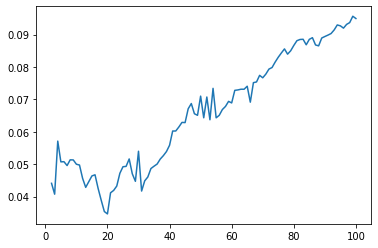

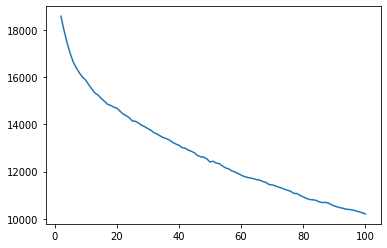

In [18]:
plt.plot(range(k_min,k_max+1), sil)
plt.show()

plt.plot(range(k_min,k_max+1), dist)
plt.show()

In [ ]:
k = 4
kmm = KMeans(n_clusters=k, random_state=1)
kmm.fit(X)

In [ ]:
y_pred = kmm.labels_
plt.hist(y_pred, bins=k)

In [ ]:
clusters = kmm.cluster_centers_
clusters.shape

In [ ]:
pd.DataFrame(clusters).to_csv('cluster_centers_27_03_21.csv', header=False)

In [ ]:
len(y_pred)

In [ ]:
topics = []

for i, y in enumerate(y_pred):
    topics.append([Z[i], y])

In [ ]:
dft = pd.DataFrame(topics, columns=['phrase','cluster'])

In [ ]:
dft

In [ ]:
dft.to_csv('clustering_27_03_21.csv')